### **配对交易策略（pair trading）**

**1. 数据获取：选取金种子酒（600199.SH）和舍得酒业（600702.SH）作为股票标的进行研究**

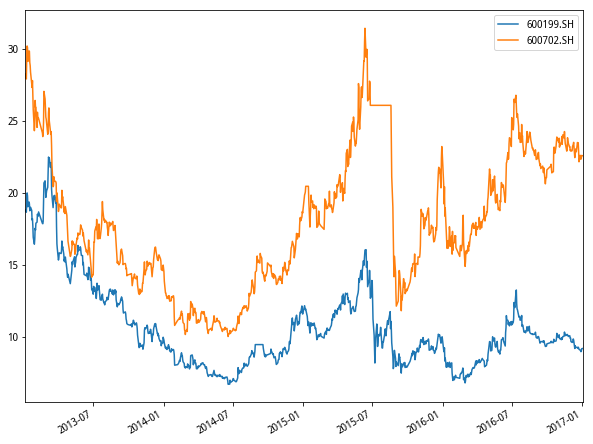

In [18]:
stocks_pair = ['600199.SH', '600702.SH']
data4=get_price(stocks_pair, '20130103', '20170103', '1d', ['close'],is_panel=1)
data4=data4['close']
data4.plot(figsize=(10,8))

**2. 策略逻辑**

In [19]:
data4.head()

,600199.SH,600702.SH
2013-01-04,18.80,28.25
2013-01-07,18.66,27.91
2013-01-08,19.44,29.33
2013-01-09,20.00,30.20
2013-01-10,19.79,30.09


**2.1 取价差，并对价差进行标准化**

In [20]:
data4['pricedelta']=data4['600199.SH']-data4['600702.SH']
data4['after_zscore']=(data4['pricedelta']-data4['pricedelta'].mean())/np.std(data4['pricedelta'])

In [21]:
data4.head()

,600199.SH,600702.SH,pricedelta,after_zscore
2013-01-04,18.80,28.25,-9.45,-0.492517
2013-01-07,18.66,27.91,-9.25,-0.442815
2013-01-08,19.44,29.33,-9.89,-0.601860
2013-01-09,20.00,30.20,-10.20,-0.678898
2013-01-10,19.79,30.09,-10.30,-0.703748


In [23]:
threshold=1.5
len(data4[data4['after_zscore'] < - threshold])

84

**2.2 策略逻辑:<br/>当标准化后的价差大于阀门，则600199做空<br/>当标准化后的价差小于负的阀门，则600199做多<br/>当标准化后的价差在半个阀门范围内则平仓**

In [27]:
data4['position_600199'] = np.where(data4['after_zscore'] > threshold, -1, np.nan)
data4['position_600199'] = np.where(data4['after_zscore'] < -threshold, 1, data4['position_600199'])
data4['position_600199'] = np.where(abs(data4['after_zscore']) < threshold/2, 0, data4['position_600199'])
data4['position_600199'] = data4['position_600199'].fillna(method = 'ffill')

In [29]:
data4.tail()

,600199.SH,600702.SH,pricedelta,after_zscore,position_600199
2016-12-27,9.06,22.40,-13.34,-1.459213,1.0
2016-12-28,8.98,22.34,-13.36,-1.464183,1.0
2016-12-29,9.00,22.40,-13.40,-1.474124,1.0
2016-12-30,9.18,22.60,-13.42,-1.479094,1.0
2017-01-03,9.21,22.57,-13.36,-1.464183,1.0


**2.3 其中600702的信号与600199的信号相反**

In [31]:
data4['position_600702']=-data4['position_600199']
data4.tail()

,600199.SH,600702.SH,pricedelta,after_zscore,position_600199,position_600702
2016-12-27,9.06,22.40,-13.34,-1.459213,1.0,-1.0
2016-12-28,8.98,22.34,-13.36,-1.464183,1.0,-1.0
2016-12-29,9.00,22.40,-13.40,-1.474124,1.0,-1.0
2016-12-30,9.18,22.60,-13.42,-1.479094,1.0,-1.0
2017-01-03,9.21,22.57,-13.36,-1.464183,1.0,-1.0


**3.策略信号**

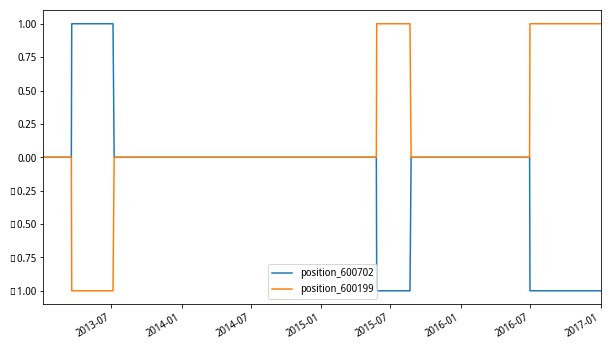

In [34]:
data4[['position_600702','position_600199']].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

**4.策略展示**

data4['return_600199']=np.log(data4['600199.SH']/data4['600199.SH'].shift(1))
data4['return_600702']=np.log(data4['600702.SH']/data4['600702.SH'].shift(1))
data4.head()

In [37]:
data4['strategy']=0.5*(data4['position_600199'].shift(1)*data4['return_600199'])+\
                  0.5*(data4['position_600702'].shift(1)*data4['return_600702'])

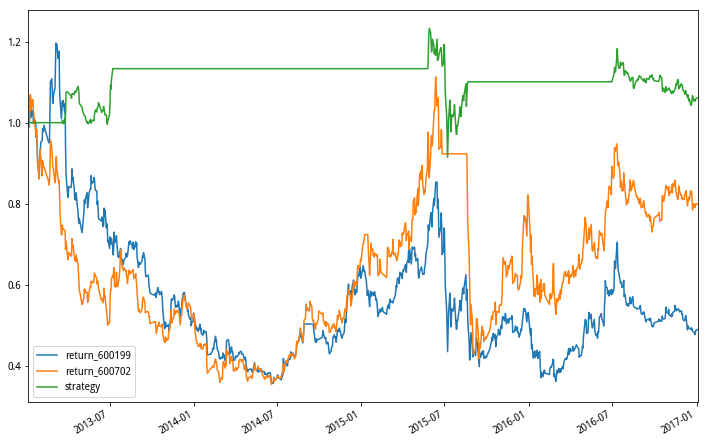

In [42]:
data4[['return_600199','return_600702','strategy']].cumsum().apply(np.exp).plot(figsize=(12, 8))